In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
!ls "/content/drive/My Drive"

 1.1.png
 1.mp4
 2.1.png
'5059-Article Text-8122-1-10-20190709.24.pdf'
 accuracy.png
 acmart-master
 ADG_A.png
 ADG_B.png
 AuthorKit21_aaai
 AuthorKit21_compression
 bare_jrnl.tex
 baselines
 bebop_data.dat
 bebop.jpg
 bi1.png
 bi23.png
 cc1.png
 cnn_stories_tokenized.zip
'Colab Notebooks'
 compression
 compressionModels
 Conference-LaTeX-template_7-9-18
 confusionMatrix.py
 covarianceData.py
 cps
 CPSPresentation
 cpsProject
 data86.csv
 data8.csv
 Data-Amazon
 data.csv
 Dataset.png
'Deep Reinforcement Learning from Human Preferences.pdf'
 document_statement.pdf
 DPPO.py
 Drone-Hover-RL-master
 Drone-Hover-RL-master.rar
 dropout.png
 dropout_value.pdf
 elementWiseFormulate.py
 els-cas-templates
 emnlp2020-templates
 environment.yml
 feature.png
'Final Presentation - Neural Network with Spark Clusters-1-2.pptx'
 FLScenario.pdf
 FLScenario.pptx
 function.py
 generated_image_log.png
 generated_image.png
'Getting started.pdf'
 humanoidStandup
 humanPrefrence
 human-test-50-1566921117
 IMG

In [80]:

#%%capture
!unzip drive/My\ Drive/cnn_stories_tokenized.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cnn_stories_tokenized/._2d052d88b3720d0158d5d540d533edc9ae869171.story  
  inflating: cnn_stories_tokenized/82e9614b6e557571655682a17dc390fef5ad87ba.story  
  inflating: __MACOSX/cnn_stories_tokenized/._82e9614b6e557571655682a17dc390fef5ad87ba.story  
  inflating: cnn_stories_tokenized/9e086ae5c6b74c2b56360ab1ed998dd1457a78ed.story  
  inflating: __MACOSX/cnn_stories_tokenized/._9e086ae5c6b74c2b56360ab1ed998dd1457a78ed.story  
  inflating: cnn_stories_tokenized/56ec764f5ac4758127c0a4d30031cd53d07a6cfe.story  
  inflating: __MACOSX/cnn_stories_tokenized/._56ec764f5ac4758127c0a4d30031cd53d07a6cfe.story  
  inflating: cnn_stories_tokenized/c51b8f66b7d0b9be0e513f2877477d592075be46.story  
  inflating: __MACOSX/cnn_stories_tokenized/._c51b8f66b7d0b9be0e513f2877477d592075be46.story  
  inflating: cnn_stories_tokenized/ca74dbef6755239c2a77733cd7c87db934f190c7.story  
  inflating: __MACOSX/cnn_stories_tokenized/._ca74dbef

In [81]:
from os import listdir
import string
import numpy as np

In [82]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [211]:
load_doc("/content/drive/My Drive/Data-Amazon/human_source/1.txt")
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("/content/drive/My Drive/Data-Amazon/human_source/1.txt")
data = fp.read()
Sentences = []
Sentences.append(tokenizer.tokenize(data))
#print ("\n".join(tokenizer.tokenize(data)))
print(Sentences[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['The story is dialogue driven and the dialogue is magical.', 'I laughed out loud many times as the pages flew by.', 'There are no issues with gratuitous violence or sexual content and just a few bombs that were totally unnecessary.', 'In fact, they were the only expletives on one page, absurd.', 'That issue aside, this book is worth every one of those five star and then some, Bravo, Ms Vanderah.', 'The importance of forgiveness in life is also covered.', 'The author ties everything up at the end very nicely and all the answers are there.', 'An interesting mix of characters also contributed to the plot.', 'I loved the independence of Tabby.', 'I would like to meet her and have a conversation and I highly recommended.', 'I downloaded this book this afternoon as a Kindle First Look and I finished it a half hour ago.', 'The characters were achingly real, the dialogue authentic, t

In [83]:
# load all stories in a directory
def load_stories(directory):
	for name in listdir(directory):
		filename = directory + '/' + name
		# load document
		doc = load_doc(filename)

In [84]:
# split a document into news story and highlights
def split_story(doc):
	# find first highlight
	index = doc.find('@highlight')
	# split into story and highlights
	story, highlights = doc[:index], doc[index:].split('@highlight')
	# strip extra white space around each highlight
	highlights = [h.strip() for h in highlights if len(h) > 0]
	return story, highlights

In [85]:
# load all stories in a directory
def load_stories(directory):
	all_stories = list()
	only_sentences = list()
	for name in listdir(directory):
		filename = directory + '/' + name
		# load document
		doc = load_doc(filename)
		# split into story and highlights
		story, highlights = split_story(doc)
		# store
		all_stories.append({'story':story, 'highlights':highlights})					#uncomment this line to return all_stories
		only_sentences.append(story)
	return only_sentences,all_stories										#also returns all_stories but removed to save ram

In [86]:
directory = '/content/cnn_stories_tokenized'
only_sentences, stories = load_stories(directory)
print('Loaded Stories %d' % len(only_sentences))

Loaded Stories 92579


In [87]:
only_sentences[0]

"-LRB- CNN -RRB- -- In just four days , Chris Picco went from husband and expectant father to a man without a family .\n\nHis wife Ashley died November 8 ; their newborn son , delivered by emergency cesarean section , died three days later .\n\nIn August , Ashley and Chris Picco celebrated their seventh wedding anniversary by posting a photo to Facebook . In the image , a tiny pair of fur-lined baby booties stands empty between the Southern California couple . `` Coming Soon '' is inscribed above . It is still Ashley 's cover photo .\n\nAshley was a mother for only a few short hours before she died . She left behind `` harmonies that will continue to resonate in our hearts and memories , '' her family and friends posted online .\n\nLennon James was born by emergency C-section three months early , `` fighting for his life , '' Chris posted . Although Chris was grieving Ashley 's loss , he thanked those who had reached out in several online postings .\n\n`` It 's impossible to sum up wha

In [88]:
# clean a list of lines
def clean_lines(lines):
	cleaned = list()
	# prepare a translation table to remove punctuation
	table = str.maketrans('', '', string.punctuation)
	#print(len(lines))
	for line in lines:
		# strip source cnn office if it exists
		index = line.find('(CNN) -- ')
		if index > -1:
			line = line[index+len('(CNN)'):]
		# tokenize on white space
		line = line.split()
		# convert to lower case
		line = [word.lower() for word in line]
		# remove punctuation from each token
		line = [w.translate(table) for w in line]
		# remove tokens with numbers in them
		line = [word for word in line if word.isalpha()]
		# store as string
		cleaned.append(' '.join(line))
	# remove empty strings
	cleaned = [c for c in cleaned if len(c) > 0]
	return cleaned

In [89]:
# clean stories
for example in stories:
	example['story'] = clean_lines(example['story'].split('\n'))
	example['highlights'] = clean_lines(example['highlights'])
 
# clean only_sentences
count=0
cleaned_sentences = []
len_each_doc=[]
progress=10
for example in only_sentences:
	count+=1
	percent = (count/92579)*100
	percent = int(percent)
	if (percent) == progress:
		print(percent)
		progress+=10
	cleaned_sentences.extend(clean_lines(example.split('\n')))
len(cleaned_sentences)
#len(stories[1]['story'])

10
20
30
40
50
60
70
80
90
100


1972519

In [199]:
only_sentences[0:15]

["-LRB- CNN -RRB- -- In just four days , Chris Picco went from husband and expectant father to a man without a family .\n\nHis wife Ashley died November 8 ; their newborn son , delivered by emergency cesarean section , died three days later .\n\nIn August , Ashley and Chris Picco celebrated their seventh wedding anniversary by posting a photo to Facebook . In the image , a tiny pair of fur-lined baby booties stands empty between the Southern California couple . `` Coming Soon '' is inscribed above . It is still Ashley 's cover photo .\n\nAshley was a mother for only a few short hours before she died . She left behind `` harmonies that will continue to resonate in our hearts and memories , '' her family and friends posted online .\n\nLennon James was born by emergency C-section three months early , `` fighting for his life , '' Chris posted . Although Chris was grieving Ashley 's loss , he thanked those who had reached out in several online postings .\n\n`` It 's impossible to sum up wh

In [219]:
def convert(lst): 
    a = []
    for i in range(15):
      a.append(lst[i].split())
    return (a) 
print(convert(only_sentences))
word_embedding = convert(only_sentences)

print(convert(Sentences[0]))
word_embedding = convert(Sentences[0])

[['-LRB-', 'CNN', '-RRB-', '--', 'In', 'just', 'four', 'days', ',', 'Chris', 'Picco', 'went', 'from', 'husband', 'and', 'expectant', 'father', 'to', 'a', 'man', 'without', 'a', 'family', '.', 'His', 'wife', 'Ashley', 'died', 'November', '8', ';', 'their', 'newborn', 'son', ',', 'delivered', 'by', 'emergency', 'cesarean', 'section', ',', 'died', 'three', 'days', 'later', '.', 'In', 'August', ',', 'Ashley', 'and', 'Chris', 'Picco', 'celebrated', 'their', 'seventh', 'wedding', 'anniversary', 'by', 'posting', 'a', 'photo', 'to', 'Facebook', '.', 'In', 'the', 'image', ',', 'a', 'tiny', 'pair', 'of', 'fur-lined', 'baby', 'booties', 'stands', 'empty', 'between', 'the', 'Southern', 'California', 'couple', '.', '``', 'Coming', 'Soon', "''", 'is', 'inscribed', 'above', '.', 'It', 'is', 'still', 'Ashley', "'s", 'cover', 'photo', '.', 'Ashley', 'was', 'a', 'mother', 'for', 'only', 'a', 'few', 'short', 'hours', 'before', 'she', 'died', '.', 'She', 'left', 'behind', '``', 'harmonies', 'that', 'will'

In [220]:
import os
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

TPU address is grpc://10.36.203.58:8470


In [221]:
#####  faster implementation  #####


import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import tensorflow_hub as hub

# Create graph and finalize (finalizing optional but recommended).
g = tf.Graph()
with g.as_default():
  # We will be feeding 1D tensors of text into the graph.
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
  embedded_wordtext = embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Create session and initialize.
session = tf.Session(graph=g)
session.run(init_op)
word_result = []
lword_result = []
for i in range(15):
  word_result.append(session.run(embedded_wordtext, feed_dict={text_input: word_embedding[i]}))
for i in range(15):
  lword_result.append(np.array_str(word_result[i]))
print(lword_result[14])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[-0.04422223  0.03610949  0.04246213 ... -0.01648758 -0.07445292
  -0.07260125]
 [-0.00726155  0.01400722  0.00873031 ... -0.02019596 -0.05387865
  -0.02401983]
 [ 0.00055058 -0.05673342 -0.04313863 ...  0.0055599  -0.09105358
  -0.07513053]
 ...
 [-0.00717844  0.04917026  0.04064952 ... -0.03145666 -0.08154514
  -0.06862557]
 [ 0.00963022 -0.05259648 -0.07966854 ... -0.07729671 -0.05336417
  -0.04057593]
 [-0.03830097  0.05644417 -0.03133572 ... -0.04205534 -0.05822914
  -0.05550044]]


In [222]:
#####  faster implementation  #####


import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import tensorflow_hub as hub

# Create graph and finalize (finalizing optional but recommended).
g = tf.Graph()
with g.as_default():
  # We will be feeding 1D tensors of text into the graph.
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
  embedded_text = embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Create session and initialize.
session = tf.Session(graph=g)
session.run(init_op)

result = session.run(embedded_text, feed_dict={text_input: lword_result})
print(result)
str_result = []
for i in range(15):
  str_result.append(np.array_str(result[i]))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[ 0.03840962 -0.04566506  0.04552156 ... -0.03512069 -0.0719946
  -0.02207667]
 [ 0.02046314 -0.04070042  0.02407133 ... -0.02603888 -0.07155773
  -0.00072452]
 [ 0.03293282  0.03335452  0.02802428 ...  0.0047121  -0.07129267
  -0.03775452]
 ...
 [ 0.02820723 -0.03532016  0.05375577 ... -0.00898542 -0.07523231
  -0.04471815]
 [ 0.01138536 -0.00700074  0.0597422  ... -0.02465777 -0.07746083
  -0.00111657]
 [ 0.00794126 -0.00401364  0.04679659 ... -0.00816289 -0.07350677
  -0.05666286]]


In [223]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import tensorflow_hub as hub

# Create graph and finalize (finalizing optional but recommended).
g = tf.Graph()
with g.as_default():
  # We will be feeding 1D tensors of text into the graph.
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
  embedded_text = embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Create session and initialize.
session = tf.Session(graph=g)
session.run(init_op)

sec_decode = session.run(embedded_text, feed_dict={text_input: str_result})
ed_result = []
for i in range(15):
  ed_result.append(result[i])
for i in range(15):
  ed_result.append(sec_decode[i])
ed_result = np.asarray(ed_result)
print(ed_result)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[ 0.03840962 -0.04566506  0.04552156 ... -0.03512069 -0.0719946
  -0.02207667]
 [ 0.02046314 -0.04070042  0.02407133 ... -0.02603888 -0.07155773
  -0.00072452]
 [ 0.03293282  0.03335452  0.02802428 ...  0.0047121  -0.07129267
  -0.03775452]
 ...
 [ 0.03399292  0.02491013  0.05311978 ... -0.03947947 -0.05367666
  -0.03838605]
 [ 0.01800102  0.03167386  0.05329613 ... -0.04062696 -0.05428035
  -0.02493317]
 [ 0.04443003  0.03269567  0.05373641 ... -0.0386025  -0.05440484
  -0.04092034]]


In [225]:
from sklearn.metrics.pairwise import cosine_similarity
cos=cosine_similarity(ed_result)
cos

array([[0.9999998 , 0.83426714, 0.87217546, 0.83758974, 0.7418722 ,
        0.8508979 , 0.85091853, 0.8022505 , 0.78728557, 0.79880583,
        0.83843654, 0.8552234 , 0.85456836, 0.8662828 , 0.8278359 ,
        0.7715858 , 0.7590982 , 0.7729178 , 0.7591466 , 0.76482284,
        0.7766576 , 0.76495326, 0.74943364, 0.7699209 , 0.7434616 ,
        0.77742577, 0.7843541 , 0.7861791 , 0.76688427, 0.76061445],
       [0.83426714, 1.0000002 , 0.84869266, 0.8133762 , 0.8181933 ,
        0.8680568 , 0.83646405, 0.7470007 , 0.8687742 , 0.8692463 ,
        0.8865704 , 0.78354484, 0.87308943, 0.8158634 , 0.8545078 ,
        0.74454075, 0.7566483 , 0.7556721 , 0.7574541 , 0.7609608 ,
        0.7732287 , 0.7699322 , 0.761446  , 0.75669706, 0.74464756,
        0.7533337 , 0.7673644 , 0.7714372 , 0.75377727, 0.74619913],
       [0.87217546, 0.84869266, 1.        , 0.83599067, 0.83677447,
        0.8566692 , 0.90289056, 0.8719069 , 0.8622406 , 0.83727765,
        0.8921419 , 0.8398131 , 0.84507245, 0.

In [228]:
#adjacency matrix
size=ed_result.shape[0]
#size = 30
adj_matrix=np.zeros((size,size))
ii=0
jj=0
for i in range(size):
  for j in range(size):
    if cos[i][j]>0.9:   
      adj_matrix[i][j] = 1
    else:
      adj_matrix[i][j] = 0
adj_matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0

In [229]:
np.matmul(adj_matrix,ed_result)

array([[ 3.84096205e-02, -4.56650592e-02,  4.55215611e-02, ...,
        -3.51206921e-02, -7.19945952e-02, -2.20766738e-02],
       [ 2.04631407e-02, -4.07004207e-02,  2.40713283e-02, ...,
        -2.60388758e-02, -7.15577304e-02, -7.24520127e-04],
       [ 6.14651702e-02, -4.03115153e-03,  5.78355975e-02, ...,
         1.07704247e-02, -1.40820324e-01, -6.67176731e-02],
       ...,
       [ 5.24778724e-01,  3.44209877e-01,  7.96760749e-01, ...,
        -5.52083021e-01, -8.11972950e-01, -4.32936111e-01],
       [ 5.24778724e-01,  3.44209877e-01,  7.96760749e-01, ...,
        -5.52083021e-01, -8.11972950e-01, -4.32936111e-01],
       [ 5.24778724e-01,  3.44209877e-01,  7.96760749e-01, ...,
        -5.52083021e-01, -8.11972950e-01, -4.32936111e-01]])

In [230]:
D = np.array(np.sum(adj_matrix, axis=0))
D = np.matrix(np.diag(D))

In [231]:
seed=22321
np.random.seed(seed)
W_1 = tf.Variable(tf.random_normal([512, size], name='W_1'))
W_2 = tf.Variable(tf.random_normal([W_1.shape[1], size], name='W_2')) 
# W_2 = np.random.normal(
#     loc=0, size=(W_1.shape[1], size))

W_1=tf.cast(W_1, tf.float64)
W_2=tf.cast(W_2, tf.float64)

def gcn_layer(A_hat, D_hat, X, W):
  Di = np.linalg.inv(D_hat)
  print(Di.shape)
  print(A_hat.shape)
  #print(X.shape)
  print(W.shape)
  X=tf.cast(X, tf.float64)
  A_hat=tf.cast(A_hat, tf.float64)
  # W=tf.cast(W, tf.float64)
  aaa=tf.linalg.matmul(Di,A_hat)
  bbb=tf.linalg.matmul(X,W)
  ccc=tf.linalg.matmul(aaa,bbb)
  #above 3 calcs are equal to Di * A_hat * X * W
  return tf.nn.relu(ccc)
    
#adj_matrix, D, message_embeddings, W

H_1 = gcn_layer(adj_matrix, D, ed_result, W_1)
H_2 = gcn_layer(adj_matrix, D, H_1, W_2)

output = H_2

ed_result=tf.cast(ed_result, tf.float64)
Di = np.linalg.inv(D)
inp=tf.linalg.matmul(tf.linalg.matmul(Di,adj_matrix), tf.linalg.matmul(ed_result,W_1) )
#inp=Di * adj_matrix * result * W_1
inp=tf.convert_to_tensor(inp) 
# with tf.Session() as sess: 
#     print('Input type:', inp) 
#     print('Input:', sess.run(inp)) 
#     print('Return type:', H_2) 
#     print('Output:', sess.run(H_2)) 
# print(H_2==0)

(30, 30)
(30, 30)
(512, 30)
(30, 30)
(30, 30)
(30, 30)


In [232]:
#salience estimation
np.random.seed(seed)
salienceW = tf.Variable(tf.random_normal([size, size], name='salienceW'))
#salienceW = np.random.normal(loc=0, scale=1, size=(size,size))
salienceW=tf.cast(salienceW, tf.float64)
tanned=tf.nn.sigmoid(tf.linalg.matmul(H_2 , salienceW))
# with tf.Session() as sess:
#   out_tan=sess.run(tanned)

#print("tan=",out_tan.shape)

v = tf.Variable(tf.random_normal([size,1], name='v'))
#v = np.random.normal(loc=0, scale=1, size=(size,1))

v=tf.cast(v, tf.float64)

fs=tf.linalg.matmul(tanned, v)
# with tf.Session() as sess:
#   fs=sess.run(tf.linalg.matmul(tanned, v))
# fs.shape

sum_salience=tf.reduce_sum(fs, 0)
# with tf.Session() as sess:
#   sum_salience=sess.run(tf.reduce_sum(fs, 0))
  #salience=sess.run(fs/sum_salience)

salience=fs/sum_salience
# #print (fs)
# print (salience)
# idx=salience.argmax()
# print(idx)
# print(cleaned_sentences[idx])
# stories[0]['highlights']
print(salience)

Tensor("truediv_2:0", shape=(30, 1), dtype=float64)


In [233]:
# calculation of rouge

a=stories[0]['highlights']
overlap=[]
for i in range(len(cleaned_sentences[0:30])):
  overlap.append(0)
  for j in cleaned_sentences[i].split():
    result=a[0].find(j)
    if result!=-1:
     overlap[i]+=1
     #print(j)
rouge1=[]
for d in overlap:
  t=d/len(a[0])
  rouge1.append(t)
rouge1[0:100]

smR1=tf.nn.softmax(rouge1)
fin_smR1=smR1
# with tf.Session() as sess: 
#   fin_smR1=sess.run(smR1)
fin_smR1

<tf.Tensor 'Softmax_2:0' shape=(30,) dtype=float32>

In [234]:
#Calculating cross entropy
fin_smR1=tf.cast(fin_smR1, tf.float64)
fin_smR1 = tf.reshape(fin_smR1,[1,30])




#y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy_ob = -tf.linalg.matmul( fin_smR1, (salience))

In [235]:
#optimmizer

optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cross_entropy_ob)

In [236]:
init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

inp_np=inp.eval(session=sess)



fin_smR1_np=fin_smR1.eval(session=sess)

salience_np=salience.eval(session=sess)


dataX = tf.placeholder(tf.float64, [None, 30])
# now declare the output data placeholder - 10 digits
labelY = tf.placeholder(tf.float64, [None, 30])

init_op = tf.global_variables_initializer()
total_batch=8

correct_prediction = tf.equal(tf.argmax(fin_smR1, 1), tf.argmax(salience_np, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   #total_batch = int(len(mnist.train.labels) / 100)
   for epoch in range(10000):
        avg_cost = 0
        for i in range(total_batch):
            batch_x = inp_np
            batch_y = fin_smR1_np
            _, c = sess.run([optimiser, cross_entropy_ob], feed_dict={dataX: batch_x, labelY: batch_y})
            avg_cost += c / total_batch
        #print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        print("Epoch:", (epoch + 1))
   #print(sess.run(accuracy, feed_dict={x: batch_x, y: batch_y}))

Streaming output truncated to the last 5000 lines.
Epoch: 5002
Epoch: 5003
Epoch: 5004
Epoch: 5005
Epoch: 5006
Epoch: 5007
Epoch: 5008
Epoch: 5009
Epoch: 5010
Epoch: 5011
Epoch: 5012
Epoch: 5013
Epoch: 5014
Epoch: 5015
Epoch: 5016
Epoch: 5017
Epoch: 5018
Epoch: 5019
Epoch: 5020
Epoch: 5021
Epoch: 5022
Epoch: 5023
Epoch: 5024
Epoch: 5025
Epoch: 5026
Epoch: 5027
Epoch: 5028
Epoch: 5029
Epoch: 5030
Epoch: 5031
Epoch: 5032
Epoch: 5033
Epoch: 5034
Epoch: 5035
Epoch: 5036
Epoch: 5037
Epoch: 5038
Epoch: 5039
Epoch: 5040
Epoch: 5041
Epoch: 5042
Epoch: 5043
Epoch: 5044
Epoch: 5045
Epoch: 5046
Epoch: 5047
Epoch: 5048
Epoch: 5049
Epoch: 5050
Epoch: 5051
Epoch: 5052
Epoch: 5053
Epoch: 5054
Epoch: 5055
Epoch: 5056
Epoch: 5057
Epoch: 5058
Epoch: 5059
Epoch: 5060
Epoch: 5061
Epoch: 5062
Epoch: 5063
Epoch: 5064
Epoch: 5065
Epoch: 5066
Epoch: 5067
Epoch: 5068
Epoch: 5069
Epoch: 5070
Epoch: 5071
Epoch: 5072
Epoch: 5073
Epoch: 5074
Epoch: 5075
Epoch: 5076
Epoch: 5077
Epoch: 5078
Epoch: 5079
Epoch: 5080
E

In [237]:
max_att = []
print(fin_smR1_np)
for j in range(14):
  attention = []
  sum_dattention = 0
  for i in range(14):
    sum_dattention += abs(fin_smR1_np[0][i+1+j]-fin_smR1_np[0][i+j])
  for i in range(14):
    attention.append(abs(fin_smR1_np[0][i+1+j]-fin_smR1_np[0][i+j])/sum_dattention)
  max_att.append(attention)
print(np.asarray(max_att).shape)

[[0.03175816 0.03066317 0.0346698  0.03175816 0.03406687 0.0365434
  0.03919997 0.03120586 0.02960592 0.03012991 0.02960592 0.02909105
  0.02960592 0.03012991 0.02960592 0.05972369 0.03232024 0.03175816
  0.03289226 0.03347442 0.0346698  0.03528341 0.03175816 0.0346698
  0.03528341 0.03120586 0.03347442 0.03120586 0.03232024 0.03232024]]
(14, 14)


Text(0.5, 1.0, 'Attention')

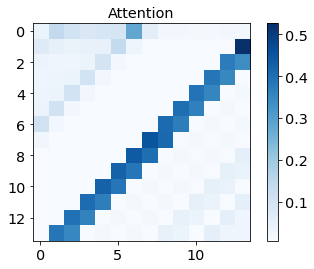

In [238]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from numpy.linalg import norm
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
nodeDegree = []
salience_nplist = []
a = np.random.random((16, 16))

plt.imshow(np.asarray(max_att), cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Attention')

[[0.9999998  0.83426714 0.87217546 0.83758974 0.7418722  0.8508979
  0.85091853 0.8022505  0.78728557 0.79880583 0.83843654 0.8552234
  0.85456836 0.8662828  0.8278359  0.7715858  0.7590982  0.7729178
  0.7591466  0.76482284 0.7766576  0.76495326 0.74943364 0.7699209
  0.7434616  0.77742577 0.7843541  0.7861791  0.76688427 0.76061445]
 [0.83426714 1.0000002  0.84869266 0.8133762  0.8181933  0.8680568
  0.83646405 0.7470007  0.8687742  0.8692463  0.8865704  0.78354484
  0.87308943 0.8158634  0.8545078  0.74454075 0.7566483  0.7556721
  0.7574541  0.7609608  0.7732287  0.7699322  0.761446   0.75669706
  0.74464756 0.7533337  0.7673644  0.7714372  0.75377727 0.74619913]
 [0.87217546 0.84869266 1.         0.83599067 0.83677447 0.8566692
  0.90289056 0.8719069  0.8622406  0.83727765 0.8921419  0.8398131
  0.84507245 0.84093    0.88967717 0.7858522  0.8207889  0.7994429
  0.7934915  0.80512345 0.7963748  0.8037756  0.79674894 0.79719275
  0.79321235 0.791512   0.797516   0.8180951  0.7985965

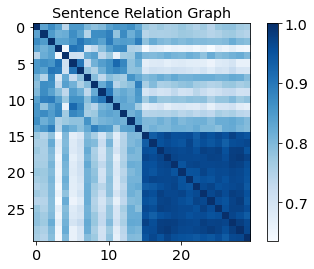

[0.021879029008961753, 0.03545618568751261, 0.029682701334483235, 0.02740231884700811, 0.0379723909631404, 0.02906393054797686, 0.028691490148379652, 0.02525769284469526, 0.03547542402842689, 0.03368669028671384, 0.0297783518298928, 0.024628128422912298, 0.03340696714603214, 0.025965070553007275, 0.027046967824796656]
0.9884014316590499


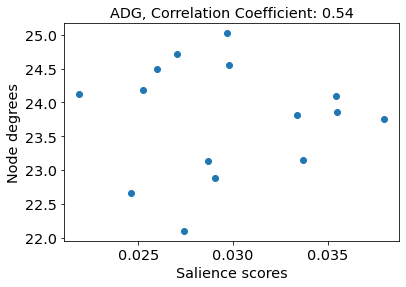

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from numpy.linalg import norm
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
nodeDegree = []
salience_nplist = []
a = np.random.random((16, 16))

plt.imshow(cos, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Sentence Relation Graph')
print(cos)
#plt.savefig("/content/drive/My Drive/SRG_A")
plt.show()
cos.shape
#print(cos.shape)
for i in range(15):
  nodeDegree.append(sum(cos[i]))
#print(nodeDegree)
tf.Print(salience,[salience])
#print(salience_np)
for i in range(15):
  salience_nplist.append(abs(salience_np[i][0]))
print(salience_nplist)
plt.scatter(salience_nplist,nodeDegree)
cosSI = np.inner(salience_nplist, nodeDegree)/(norm(salience_nplist)*norm(nodeDegree))
print(cosSI)
plt.ylabel('Node degrees')
plt.xlabel('Salience scores')
plt.title('ADG, Correlation Coefficient: 0.54')
#plt.savefig("/content/drive/My Drive/ADG_B")
plt.show()

248.0

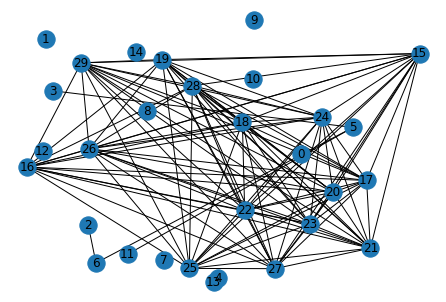

In [241]:
import networkx as nx
import numpy as np

G = nx.from_numpy_matrix(np.array(adj_matrix)) 
pos = nx.spring_layout(G,k=0.8,iterations=1)
nx.draw(G, with_labels=True,pos=pos)


adj_matrix.sum()